In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
dsp_data = pd.read_csv(os.path.abspath(os.getcwd()) + '\\dsp\\concatenated\\main.csv', encoding = "UTF-16LE", low_memory=False)
dsp_data.shape

(29201, 48)

In [3]:
mnlz_data = pd.read_csv(os.path.abspath(os.getcwd()) + '\\mnlz\\mnlz.csv', encoding = "UTF-16LE", low_memory=False)
mnlz_data.shape

(32804, 568)

In [4]:
dsp_data = dsp_data.drop_duplicates(subset=['HEATCUST'])
mnlz_data = mnlz_data.drop_duplicates(subset=['HEAT_ID'])
data = pd.merge(dsp_data, mnlz_data,  left_on='HEATCUST', right_on='HEAT_ID', how='inner')
data.shape

(28412, 616)

In [5]:
data[['time1', 'temp1']] = data['Температура_1'].str.split(expand=True)
data[['time2', 'temp2']] = data['Температура_2'].str.split(expand=True)
data[['time3', 'temp3']] = data['Температура_3'].str.split(expand=True)
data['last_temp'] = data['последняя_температура']

data[['temp1', 'temp2', 'temp3', 'last_temp']] =  data[['temp1', 'temp2', 'temp3', 'last_temp']].astype('float32')

data['time1'] = pd.to_datetime(data['time1'], format='%H:%M:%S')
data['time2'] = pd.to_datetime(data['time2'], format='%H:%M:%S')
data['time3'] = pd.to_datetime(data['time3'], format='%H:%M:%S')

In [6]:
print(data.shape)
data = data.drop(['Температура_1', 'Температура_2', 'Температура_3', 'последняя_температура'], 1)
data = data.fillna(0)
print(data.shape)

(28412, 623)
(28412, 619)


In [7]:
data.loc[data['Ручей1_Брак_загот.шт-вес'] != 0, 'Ручей1_Брак_загот.шт-вес'] = 1
data.loc[data['Ручей1_Брак_загот.шт-вес'] == 0, 'Ручей1_Брак_загот.шт-вес'] = 0
data['Ручей1_Брак_загот.шт-вес'] = pd.to_numeric(data['Ручей1_Брак_загот.шт-вес'])

data.loc[data['Ручей2_Брак_загот.шт-вес'] != 0, 'Ручей2_Брак_загот.шт-вес'] = 1
data.loc[data['Ручей2_Брак_загот.шт-вес'] == 0, 'Ручей2_Брак_загот.шт-вес'] = 0
data['Ручей2_Брак_загот.шт-вес'] = pd.to_numeric(data['Ручей2_Брак_загот.шт-вес'])

data.loc[data['Ручей3_Брак_загот.шт-вес'] != 0, 'Ручей3_Брак_загот.шт-вес'] = 1
data.loc[data['Ручей3_Брак_загот.шт-вес'] == 0, 'Ручей3_Брак_загот.шт-вес'] = 0
data['Ручей3_Брак_загот.шт-вес'] = pd.to_numeric(data['Ручей3_Брак_загот.шт-вес'])


data.loc[data['Ручей4_Брак_загот.шт-вес'] != 0, 'Ручей4_Брак_загот.шт-вес'] = 1
data.loc[data['Ручей4_Брак_загот.шт-вес'] == 0, 'Ручей4_Брак_загот.шт-вес'] = 0
data['Ручей4_Брак_загот.шт-вес'] = pd.to_numeric(data['Ручей4_Брак_загот.шт-вес'])


data.loc[data['Ручей5_Брак_загот.шт-вес'] != 0, 'Ручей5_Брак_загот.шт-вес'] = 1
data.loc[data['Ручей5_Брак_загот.шт-вес'] == 0, 'Ручей5_Брак_загот.шт-вес'] = 0
data['Ручей5_Брак_загот.шт-вес'] = pd.to_numeric(data['Ручей5_Брак_загот.шт-вес'])

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_for_learning = data.select_dtypes(include=numerics)
features = [s for s in list(data_for_learning.columns) if 'Брак' not in s]
features = [s for s in features if 'качество' not in s]
features = [s for s in features if 'Годные_загот' not in s]

target_columns = [s for s in list(data_for_learning.columns) if '_Брак_' in s]
print(len(features), len(target_columns))

509 5


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, log_loss, plot_roc_curve
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

In [10]:
train, test = train_test_split(data_for_learning, test_size=0.2)

print(train.shape)
print(test.shape)

(22729, 521)
(5683, 521)


In [ ]:
number_of_trees = np.linspace(1, 100, num=11, dtype='int')
f_scores = []
accuraciy_values = []
loss_values = []
for n in number_of_trees:
    print(n)
    clf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    clf.fit(train[features], train[target_columns])
    y_predicted = clf.predict(test[features])
    f_scores.append(f1_score(test[target_columns], y_predicted, average='micro'))
    accuraciy_values.append(accuracy_score(test[target_columns], y_predicted))
    loss_values.append(log_loss(test[target_columns], y_predicted))

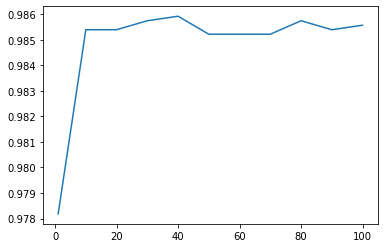

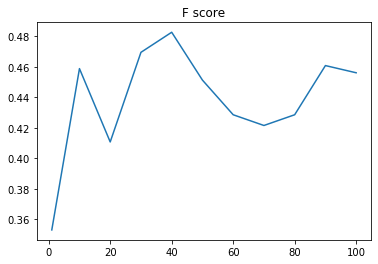

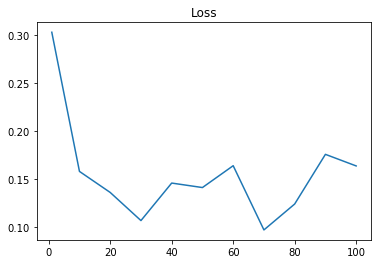

In [66]:
plt.plot(number_of_trees, accuraciy_values)
plt.show()

plt.plot(number_of_trees, f_scores)
plt.title('F score')
plt.show()


plt.plot(number_of_trees, loss_values)
plt.title('Loss')
plt.show()

In [13]:
print(classification_report(test[target_columns], y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        42
           1       0.92      0.23      0.37        47
           2       1.00      0.39      0.57        38
           3       1.00      0.06      0.12        31
           4       1.00      0.06      0.11        17

   micro avg       0.98      0.27      0.42       175
   macro avg       0.98      0.24      0.35       175
weighted avg       0.98      0.27      0.40       175
 samples avg       0.00      0.00      0.00       175



c:\programdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\programdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
out = []
for i, imp in enumerate(clf.feature_importances_):
    if imp > 0.001:
        out.append((features[i], imp))
sorted(out, key=lambda tup: tup[1], reverse=True)

In [15]:
rus = RandomUnderSampler()
X_resampled1, y_resampled1 = rus.fit_resample(data, data_for_learning[target_columns[0]])
X_resampled2, y_resampled2 = rus.fit_resample(data, data_for_learning[target_columns[1]])
X_resampled3, y_resampled3 = rus.fit_resample(data, data_for_learning[target_columns[2]])
X_resampled4, y_resampled4 = rus.fit_resample(data, data_for_learning[target_columns[3]])
X_resampled5, y_resampled5 = rus.fit_resample(data, data_for_learning[target_columns[4]])

In [16]:
frames = [X_resampled1, X_resampled2, X_resampled3, X_resampled4, X_resampled5]
rus_X = pd.concat(frames, join='outer', verify_integrity=False)

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
rus_data = rus_X.select_dtypes(include=numerics)
features = [s for s in list(rus_data.columns) if 'Брак' not in s]
features = [s for s in features if 'качество' not in s]
features = [s for s in features if 'Годные_загот' not in s]

target_columns = [s for s in list(rus_data.columns) if '_Брак_' in s]
print(len(features), len(target_columns))

509 5


In [18]:
rus_train, rus_test = train_test_split(rus_data, test_size=0.2)

print(rus_train.shape)
print(rus_test.shape)

(1633, 521)
(409, 521)


In [67]:
number_of_trees = np.linspace(1, 100, num=11, dtype='int')
f_scores = []
accuraciy_values = []
loss_values = []
for n in number_of_trees:
    clf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    clf.fit(rus_train[features], rus_train[target_columns])
    rus_y_predicted = clf.predict(rus_test[features])
    f_scores.append(f1_score(rus_test[target_columns], rus_y_predicted, average='micro'))
    accuraciy_values.append(accuracy_score(rus_test[target_columns], rus_y_predicted))
    loss_values.append(log_loss(rus_test[target_columns], rus_y_predicted))

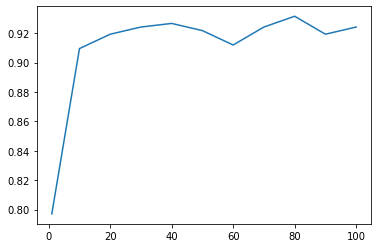

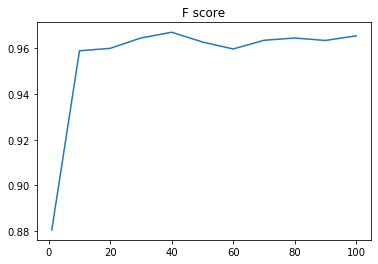

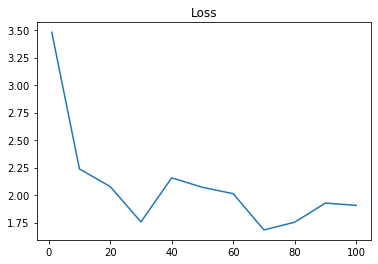

In [68]:
plt.plot(number_of_trees, accuraciy_values)
plt.show()

plt.plot(number_of_trees, f_scores)
plt.title('F score')
plt.show()


plt.plot(number_of_trees, loss_values)
plt.title('Loss')
plt.show()

In [21]:
print(classification_report(rus_test[target_columns], rus_y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.98      0.93      0.95       131
           2       0.98      0.98      0.98       127
           3       0.93      0.95      0.94        88
           4       0.97      0.96      0.97        77

   micro avg       0.96      0.96      0.96       550
   macro avg       0.96      0.96      0.96       550
weighted avg       0.96      0.96      0.96       550
 samples avg       0.45      0.45      0.45       550



c:\programdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\programdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
out = []
for i, imp in enumerate(clf.feature_importances_):
    if imp > 0.001:
        out.append((features[i], imp))
sorted(out, key=lambda tup: tup[1], reverse=True)

                          Ручей1_Брак_загот.шт-вес  Мин.знач.Скор.разл.Руч1  \
Ручей1_Брак_загот.шт-вес                  1.000000                 0.148724   
Мин.знач.Скор.разл.Руч1                   0.148724                 1.000000   
Мин.знач.Ур.в.крист.Руч1                  0.252803                 0.435420   
Ручей1-длинна_хвоста                      0.060072                 0.110035   
Кон.вес_в_п/к(т)                          0.128263                 0.329498   

                          Мин.знач.Ур.в.крист.Руч1  Ручей1-длинна_хвоста  \
Ручей1_Брак_загот.шт-вес                  0.252803              0.060072   
Мин.знач.Скор.разл.Руч1                   0.435420              0.110035   
Мин.знач.Ур.в.крист.Руч1                  1.000000              0.117509   
Ручей1-длинна_хвоста                      0.117509              1.000000   
Кон.вес_в_п/к(т)                          0.196283              0.142423   

                          Кон.вес_в_п/к(т)  
Ручей1_Брак_загот.шт-ве

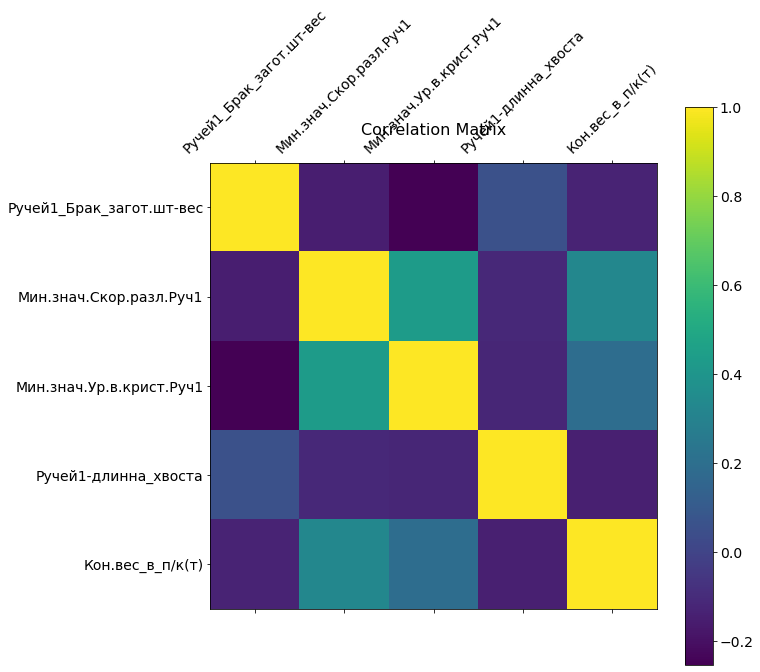

In [79]:
df = data[['Ручей1_Брак_загот.шт-вес','Мин.знач.Скор.разл.Руч1' , 'Мин.знач.Ур.в.крист.Руч1', 'Ручей1-длинна_хвоста', 'Кон.вес_в_п/к(т)']]
print(df.corr().abs())
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

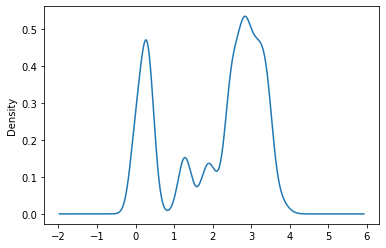

In [27]:
data['Мин.знач.Скор.разл.Руч1'].plot.density()

In [28]:
from scipy import interpolate

(28412, 2)


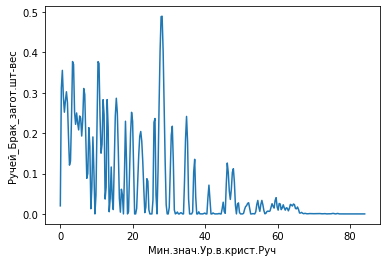

In [49]:
df = pd.DataFrame()
df[['Мин.знач.Ур.в.крист.Руч', 'Ручей_Брак_загот.шт-вес']] = data[['Мин.знач.Ур.в.крист.Руч1', 'Ручей1_Брак_загот.шт-вес']]
print(df.shape)
for i in range(2, 6):
    new_df = pd.DataFrame()
    new_df[['Мин.знач.Ур.в.крист.Руч', 'Ручей_Брак_загот.шт-вес']] = data[[f'Мин.знач.Ур.в.крист.Руч{str(i)}',f'Ручей{str(i)}_Брак_загот.шт-вес']]
    df = pd.concat((df, new_df), ignore_index=True)
df = df.fillna(0)
df = df[['Мин.знач.Ур.в.крист.Руч', 'Ручей_Брак_загот.шт-вес']].groupby('Мин.знач.Ур.в.крист.Руч', as_index=False).mean()
mold_values = df['Мин.знач.Ур.в.крист.Руч'].values
defect_values = df['Ручей_Брак_загот.шт-вес'].values
xnew = np.linspace(mold_values.min(), mold_values.max(), 300) 
spl = interpolate.make_interp_spline(mold_values, defect_values) 
y_smooth = spl(xnew)
y_smooth = np.where(y_smooth<0, 0, y_smooth)
y_smooth = np.where(y_smooth>1, 1, y_smooth)
plt.plot(xnew, y_smooth)
plt.xlabel('Мин.знач.Ур.в.крист.Руч')
plt.ylabel('Ручей_Брак_загот.шт-вес')
plt.show()

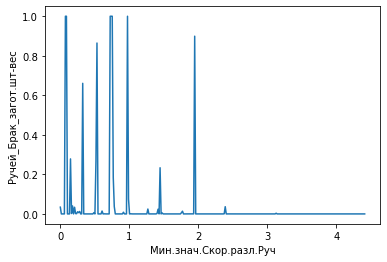

In [52]:
df = pd.DataFrame()
df[['Мин.знач.Скор.разл.Руч', 'Ручей_Брак_загот.шт-вес']] = data[['Мин.знач.Скор.разл.Руч1', 'Ручей1_Брак_загот.шт-вес']]
for i in range(2, 6):
    new_df = pd.DataFrame()
    new_df[['Мин.знач.Скор.разл.Руч', 'Ручей_Брак_загот.шт-вес']] = data[[f'Мин.знач.Скор.разл.Руч{str(i)}',
                                                                          f'Ручей{str(i)}_Брак_загот.шт-вес']]
    df = pd.concat((df, new_df), ignore_index=True)
df = df.fillna(0)
df = df[['Мин.знач.Скор.разл.Руч', 'Ручей_Брак_загот.шт-вес']].groupby('Мин.знач.Скор.разл.Руч', as_index=False).mean()
speed_values = df['Мин.знач.Скор.разл.Руч'].values
defect_values = df['Ручей_Брак_загот.шт-вес'].values
xnew = np.linspace(speed_values.min(), speed_values.max(), 300) 
spl = interpolate.make_interp_spline(speed_values, defect_values) 
y_smooth = spl(xnew)
y_smooth = np.where(y_smooth<0, 0, y_smooth)
y_smooth = np.where(y_smooth>1, 1, y_smooth)
plt.plot(xnew, y_smooth)
plt.xlabel('Мин.знач.Скор.разл.Руч')
plt.ylabel('Ручей_Брак_загот.шт-вес')
plt.show()

In [56]:
print(data['Тов.длин1-качество'].dtype)
unique, counts = np.unique(data['Тов.длин1-качество'].values, return_counts=True)
count = dict(zip(unique, counts))
count

float64


{0.0: 71, 1.0: 28155, 2.0: 186}

In [59]:
df = data[['Тов.длин1-качество','Мин.знач.Скор.разл.Руч1' , 'Мин.знач.Ур.в.крист.Руч1', 'Ручей1-длинна_хвоста', 'Кон.вес_в_п/к(т)']]
df.corr()

,Тов.длин1-качество,Мин.знач.Скор.разл.Руч1,Мин.знач.Ур.в.крист.Руч1,Ручей1-длинна_хвоста,Кон.вес_в_п/к(т)
Тов.длин1-качество,1.000000,-0.046866,-0.019017,0.029777,-0.039504
Мин.знач.Скор.разл.Руч1,-0.046866,1.000000,0.435420,-0.110035,0.329498
Мин.знач.Ур.в.крист.Руч1,-0.019017,0.435420,1.000000,-0.117509,0.196283
Ручей1-длинна_хвоста,0.029777,-0.110035,-0.117509,1.000000,-0.142423
Кон.вес_в_п/к(т),-0.039504,0.329498,0.196283,-0.142423,1.000000


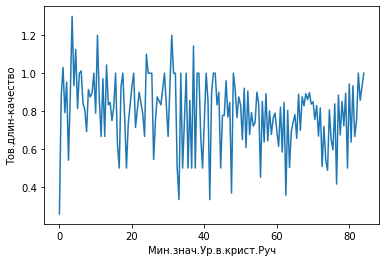

In [62]:
df = pd.DataFrame()
df[['Мин.знач.Ур.в.крист.Руч', 'Тов.длин-качество']] = data[['Мин.знач.Ур.в.крист.Руч1', 'Тов.длин1-качество']]
for i in range(2, 6):
    new_df = pd.DataFrame()
    new_df[['Мин.знач.Ур.в.крист.Руч', 'Тов.длин-качество']] = data[[f'Мин.знач.Ур.в.крист.Руч{str(i)}',f'Тов.длин{str(i)}-качество']]
    df = pd.concat((df, new_df), ignore_index=True)
df = df.fillna(0)
df = df[['Мин.знач.Ур.в.крист.Руч', 'Тов.длин-качество']].groupby('Мин.знач.Ур.в.крист.Руч', as_index=False).mean()
mold_values = df['Мин.знач.Ур.в.крист.Руч'].values
quality_values = df['Тов.длин-качество'].values
plt.plot(mold_values, quality_values)
plt.xlabel('Мин.знач.Ур.в.крист.Руч')
plt.ylabel('Тов.длин-качество')
plt.show()